In [1]:
%load_ext lab_black

In [2]:
import os

os.chdir("../..")

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list
from utils.cluster_summary import get_cluster_summary

pd.options.display.float_format = "{:,.2f}".format

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

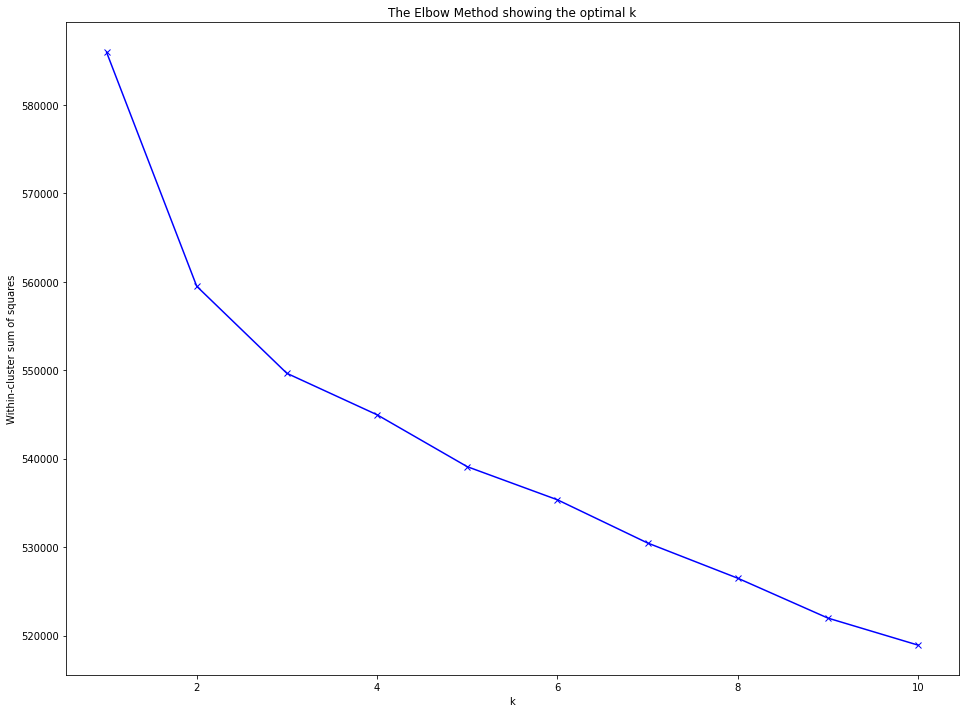

In [6]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores


wcss_vec = count_wcss_scores(X_train, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, "bx-")
plt.xlabel("k")
plt.ylabel("Within-cluster sum of squares")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [5]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=10)

In [7]:
get_metrics_of_model(kmeans, metrics_list, X_train, X_test)

value              
sample                      test         train
metric                                        
Silhouette                  0.14          0.09
mean_inclust_dist          58.01         80.61
min_interclust_dist        36.15         39.20
wcss                3,873,642.81 17,362,028.33

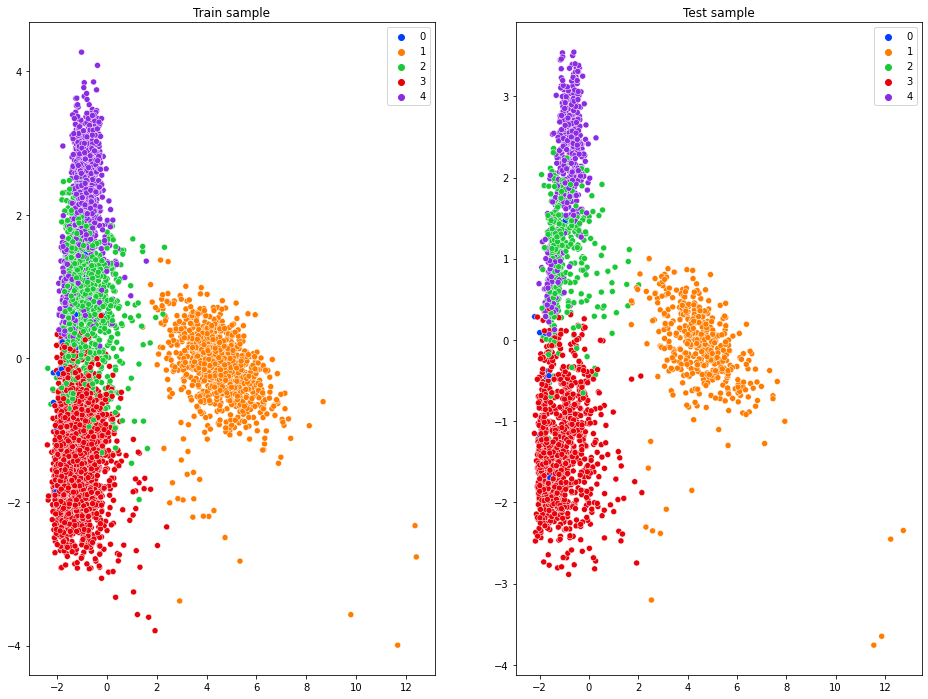

In [7]:
plot_clustering(kmeans, X_train, X_test)

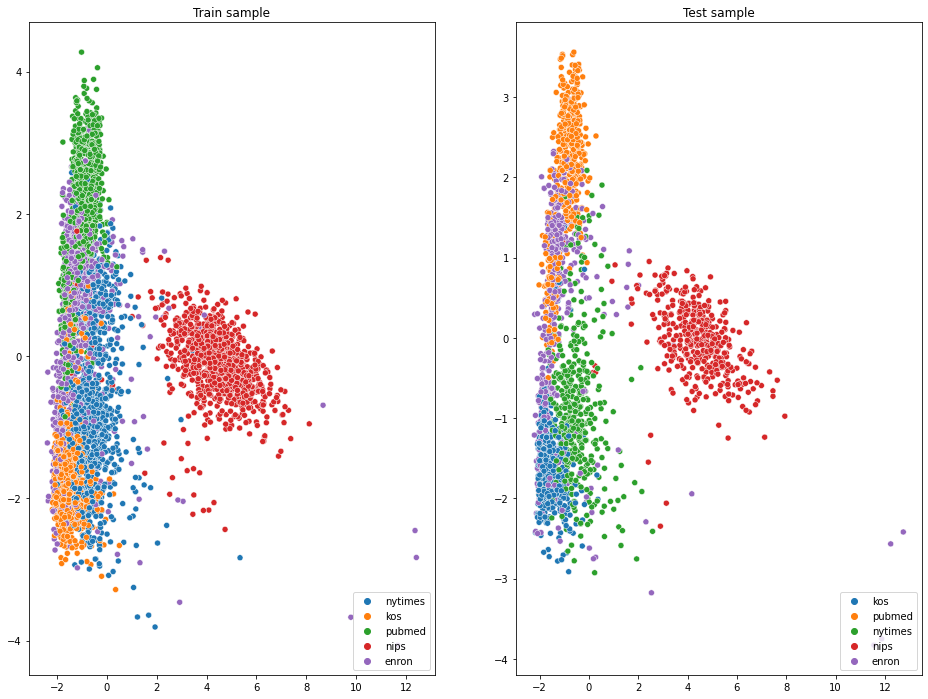

In [8]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)

In [9]:
kmeans.fit(X_train)
df_train = df_train.assign(pred=kmeans.predict(X_train))
df_test = df_test.assign(pred=kmeans.predict(X_test))

In [10]:
get_cluster_summary(df_train)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.03 0.00 0.00    0.00   0.00
1      0.01 0.00 0.98    0.00   0.00
2      0.65 0.06 0.01    0.26   0.04
3      0.27 0.93 0.00    0.70   0.04
4      0.03 0.01 0.00    0.03   0.91

In [11]:
get_cluster_summary(df_test)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.02 0.00 0.00    0.00   0.00
1      0.02 0.00 0.98    0.00   0.00
2      0.61 0.02 0.02    0.11   0.04
3      0.33 0.98 0.00    0.88   0.05
4      0.01 0.01 0.00    0.01   0.91